### Ch7 Figure1

In [1]:
# Let's say that your team worked for an online magazine. At the top of each story there’s a link that allows readers to share the article with their social network. The data analyst on your team could easily rank the stories that have been shared the most by readers. They could take that report back to the team and discuss the findings.

share_to = ['facebook', 'twitter', 'linkedin', 'google+']
  
# Thanks to http://www.ravi.io/buzzfeed-title-generator?mode=normal
# random generated buzzfeed titles:
articles = ['34 NFL Linebackers Who Are Clearly Being Raised Right',
          'The 27 Most Delicate Frat Houses From LOST',
          '40 Avril Lavigne Fans Who Completely Screwed Up Their One Job',
          'The 31 Most Beloved Gifts Of The \'80s',
          'The 48 Most Important Fragrances Of This Century',
          'The 21 Cars That Scream World Domination',
          '24 Cover Bands Who Are Only Famous To People Who Live In New York',
          '45 Water Bottles That Only Eldest Siblings Know',
          'The 13 Creepiest Charts Of The Last 10 Years',
          'The 22 Most Jizz-Worthy Series Finales Of 2013',
          '14 Snapchat Filters That Look Like Miley Cyrus',
          'The 16 Cheesiest Advertisements Of This Year']

data = []
for i in range(1000):
    data.append([i, share_to[rd.randint(0, len(share_to)-1)], articles[rd.randint(0, len(articles)-1)]])
    
df = pd.DataFrame(data, columns=['id', 'channel', 'title'])
# df.to_csv('csv_output/ch7_fig1.csv', index=False)
df = pd.read_csv('csv_output/ch7_fig1.csv')
df.head()

,id,channel,title
0,0,linkedin,45 Water Bottles That Only Eldest Siblings Know
1,1,facebook,The 31 Most Beloved Gifts Of The '80s
2,2,google+,14 Snapchat Filters That Look Like Miley Cyrus
3,3,google+,40 Avril Lavigne Fans Who Completely Screwed U...
4,4,google+,45 Water Bottles That Only Eldest Siblings Know


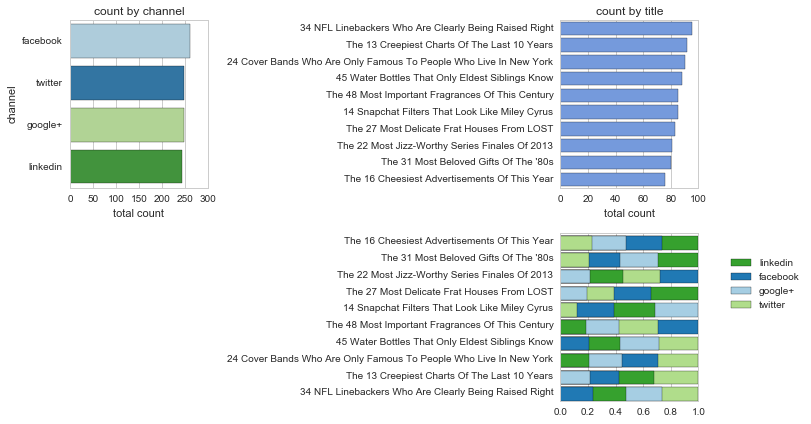

In [2]:
df = pd.read_csv('csv_output/ch7_fig1.csv')

channel_count = df.groupby('channel').id.count()
channel_count.sort_values(ascending=False, inplace=True)

title_count = df.groupby('title').id.count()
title_count.sort_values(ascending=False, inplace=True)

top_title_dist = df.groupby(['title', 'channel']).id.count()
top_title_dist.sort_values(ascending=False, inplace=True)

%matplotlib inline
sns.set_style("whitegrid")
f, ax = plt.subplots(2,2, figsize=(10,6))

colors1 = sns.color_palette("Paired", 5)

sns.barplot(x='id', y='channel', data=channel_count.reset_index(), ax=ax[0][0], palette=colors1);
ax[0][0].set_title('count by channel');
ax[0][0].set_xlabel('total count');

sns.barplot(x='id', y='title', data=title_count.reset_index()[:10], ax=ax[0][1], color='cornflowerblue');
ax[0][1].set_title('count by title');
ax[0][1].set_xlabel('total count');
ax[0][1].set_ylabel('');


selected_titles = []
for i in range(10):
    title = title_count.reset_index().ix[i]
    d=top_title_dist[title['title']]
    d.sort_values(ascending=False, inplace=True)
    d = d/sum(d)
    d = d.reset_index()
    for j in range(d.shape[0]):
        if d.ix[j, 'channel'] == 'google+':
            k = 0
        elif d.ix[j, 'channel'] == 'facebook':
            k = 1
        elif d.ix[j, 'channel'] == 'linkedin':
            k = 2
        else:
            k = 3
        ax[1][1].barh(bottom=(10-i), width=d[-(d.shape[0]-j):].sum()['id'], color=colors1[k])
    selected_titles.append(title['title'])

ax[1][1].set_ylim(1,11);
ax[1][1].set_yticks([x+.5 for x in range(1,11)]);
ax[1][1].set_yticklabels(selected_titles);
ax[1][1].legend(['linkedin', 'facebook', 'google+', 'twitter'], bbox_to_anchor=(1.8, .9));

ax[1][0].axis('off')

f.tight_layout()
f.savefig('svg_output/ch7_fig1.svg', format='svg', bbox_inches='tight')

Data consists list of randomly generated article titles and share count by channels. From the chart, we can tell even though they are all top stories in terms of share count, but the chaneel can be very different from one to another.